In [1]:
import pandas as pd
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc
%matplotlib inline

C:\Users\rr00547872\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
framingham = pd.read_csv('framingham.csv')

In [437]:
# print the first 5 rows of data
framingham.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [438]:
framingham.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
male               4240 non-null int64
age                4240 non-null int64
education          4135 non-null float64
currentSmoker      4240 non-null int64
cigsPerDay         4211 non-null float64
BPMeds             4187 non-null float64
prevalentStroke    4240 non-null int64
prevalentHyp       4240 non-null int64
diabetes           4240 non-null int64
totChol            4190 non-null float64
sysBP              4240 non-null float64
diaBP              4240 non-null float64
BMI                4221 non-null float64
heartRate          4239 non-null float64
glucose            3852 non-null float64
TenYearCHD         4240 non-null int64
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [439]:
# count the number of NaN values in each column
print(framingham.isnull().sum())

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64


In [440]:
## remove columns that are 90% empty
thresh = len(framingham) * .1
framingham.dropna(thresh = thresh, axis = 1, inplace = True)

In [441]:
##Replace
def impute_median(series):
    return series.fillna(series.median())

framingham.glucose=framingham['glucose'].transform(impute_median)
framingham.education=framingham['education'].transform(impute_median)
framingham.heartRate=framingham['heartRate'].transform(impute_median)
framingham.totChol=framingham['totChol'].transform(impute_median)
framingham.BPMeds=framingham['BPMeds'].transform(impute_median)
by_currentSmoker_class=framingham.groupby(['currentSmoker'])
framingham.cigsPerDay=by_currentSmoker_class['cigsPerDay'].transform(impute_median)
by_age_class=framingham.groupby(['age','male','diabetes'])
framingham.BMI=by_age_class['BMI'].transform(impute_median)

In [442]:
framingham.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000
mean,0.429245,49.580189,1.979953,0.494104,9.081132,0.029245,0.005896,0.310613,0.025708,236.667689,132.354599,82.897759,25.799093,75.878774,81.600943,0.151887
std,0.495027,8.572942,1.007087,0.500024,11.916119,0.168513,0.076569,0.462799,0.158280,44.328480,22.033300,11.910394,4.073071,12.023937,22.860340,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.077500,68.000000,72.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.395000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,262.000000,144.000000,90.000000,28.040000,83.000000,85.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


### Visualizations

In [443]:
def persontype_func(gender):
    if gender.item()==1:
        return 'Male'
    else:
        return 'Female' 
framingham['PersonType'] = framingham[['male']].apply(persontype_func, axis=1)

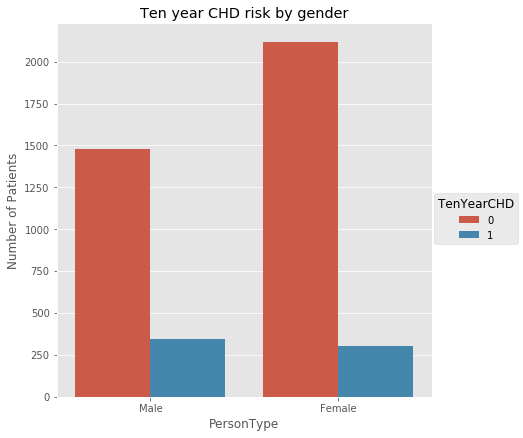

In [444]:
# How is 10-year risk of Coronary Heart Disease affect gender?

mx = sns.factorplot(x="PersonType", hue='TenYearCHD',data=framingham, kind="count", size=6)
mx.set(ylabel='Number of Patients')
plt.title('Ten year CHD risk by gender');

Text(0.5,1,'Agewise distribution of the patients')

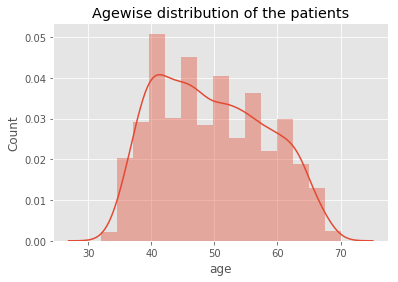

In [445]:
sns.distplot(framingham['age'], bins=15, kde=True)
plt.ylabel('Count')
plt.title('Agewise distribution of the patients')

In [446]:
def agetype_func(age):
    
    if age.item()<40:
        return 'Young'
    elif age.item()>=40 and age.item()<50:
        return 'Middle aged (40-50)' 
    elif age.item()>=50 and age.item()<60:
        return 'Middle aged(50-60)'
    else:
        return 'Old(>60)'
framingham['AgeType'] = framingham[['age']].apply(agetype_func, axis=1)

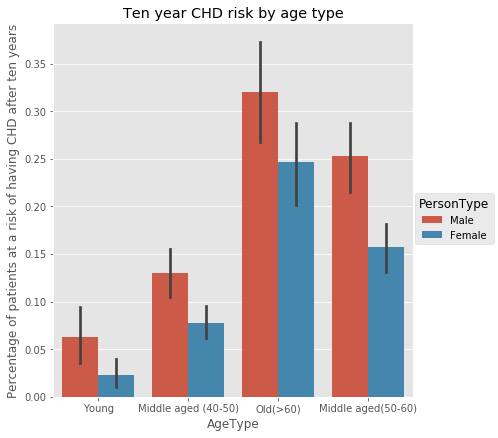

In [447]:
# How is 10-year risk of Coronary Heart Disease affect age?

mx = sns.factorplot(x="AgeType",y='TenYearCHD', hue='PersonType',data=framingham, kind="bar", size=6)
mx.set(ylabel='Percentage of patients at a risk of having CHD after ten years')
plt.title('Ten year CHD risk by age type');

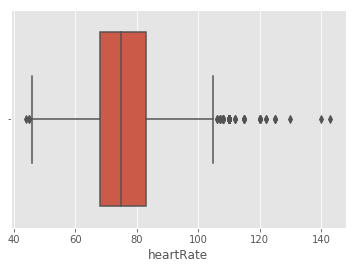

In [448]:
from matplotlib import style
style.use('ggplot')
#plt.figure(figsize=(12,4))
sns.boxplot(x='heartRate',data=framingham)

Text(0.5,1,'Scatterplot of passengers grouped by Fare and Age')

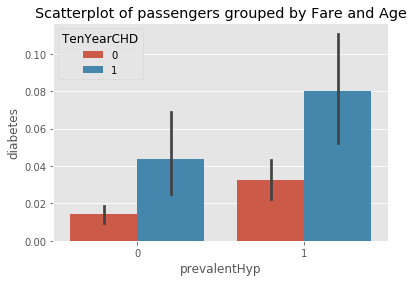

In [449]:
sns.barplot('prevalentHyp','diabetes', data=framingham,  hue="TenYearCHD")
plt.title('Scatterplot of passengers grouped by Fare and Age')

Text(0.5,1,'Scatterplot of passengers grouped by Fare and Age')

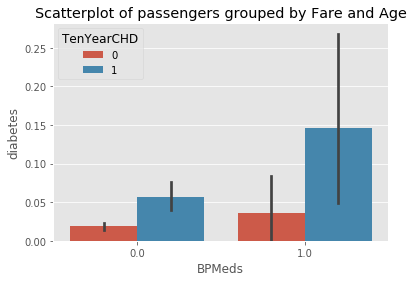

In [450]:
sns.barplot('BPMeds','diabetes', data=framingham,  hue="TenYearCHD")
plt.title('Scatterplot of passengers grouped by Fare and Age')

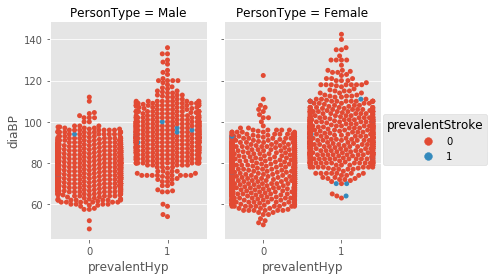

In [461]:
g = sns.factorplot(x="prevalentHyp", y="diaBP",hue="prevalentStroke", col="PersonType",data=framingham, kind="swarm",size=4, aspect=.7)

Text(0.5,1,'Scatterplot of passengers grouped by Fare and Age')

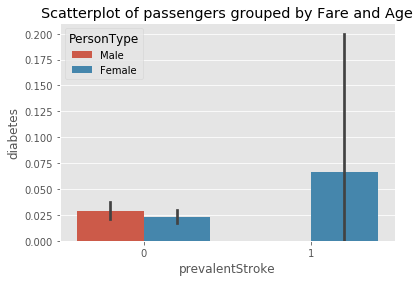

In [409]:
sns.barplot('prevalentStroke','diabetes', data=framingham,  hue="PersonType")
plt.title('Scatterplot of passengers grouped by Fare and Age')

Text(0.5,1,'Scatterplot of systolic blood pressure vs age type coloured by people who are at risk of CHD')

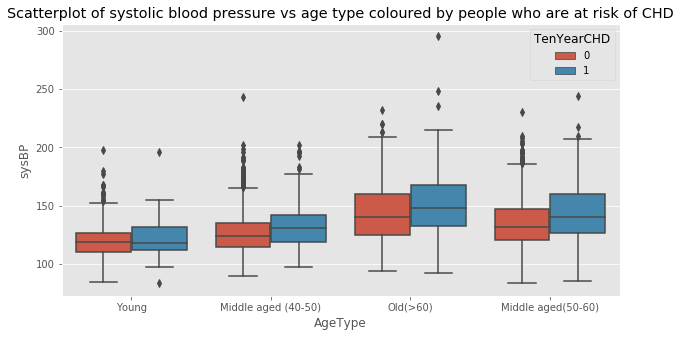

In [391]:
# As systolic blood pressure increases for each age group there is higher chance for CHD to develop after 10 years
plt.figure(figsize=(10,5))
sns.boxplot('AgeType','sysBP', data=framingham, hue="TenYearCHD")
plt.title('Scatterplot of systolic blood pressure vs age type coloured by people who are at risk of CHD')

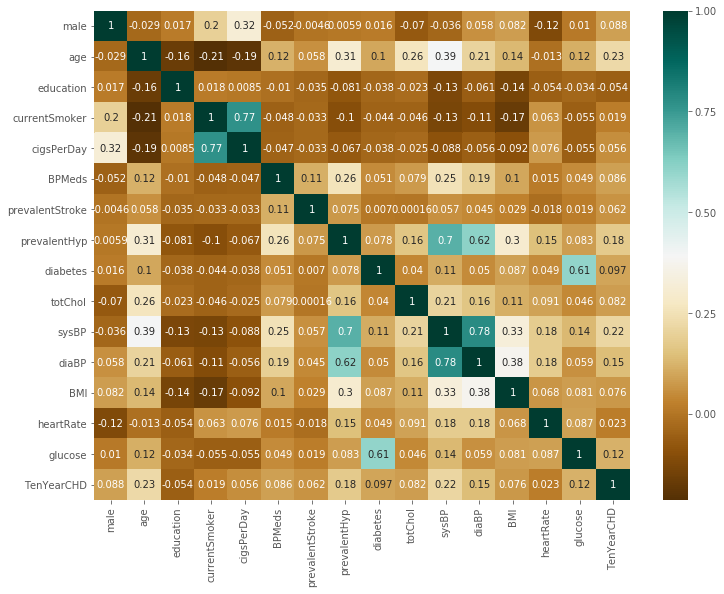

In [370]:
plt.figure(figsize=(12,9))
sns.heatmap(framingham.corr()
            ,cmap="BrBG",annot=True)

In [415]:
framingham.drop(['PersonType','AgeType'],axis=1,inplace=True)

### Prepare the data

In [416]:
X = framingham.drop(['TenYearCHD','education'],axis=1)

y = framingham.TenYearCHD

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=23)

In [462]:
# train a logistic regression model on the training set

logreg = LogisticRegression(C=0.8)
logreg.fit(X_train, y_train)

LogisticRegression(C=0.8, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [463]:
# make class predictions for the testing set
y_pred_class = logreg.predict(X_test)
# calculate accuracy with threshold of 0.5
print(metrics.accuracy_score(y_test, y_pred_class))

0.8584905660377359


In [464]:
# examine the class distribution of the testing set
y_test.value_counts()

0    908
1    152
Name: TenYearCHD, dtype: int64

In [465]:
# calculate null accuracy 
y_test.value_counts().head(1) / len(y_test)

0    0.856604
Name: TenYearCHD, dtype: float64

In [466]:
# this shows that the original accuracy is very close to baseline accuracy due to an imbalance in classes

In [467]:
conf=metrics.confusion_matrix(y_test, y_pred_class)
print(metrics.confusion_matrix(y_test, y_pred_class))

[[905   3]
 [147   5]]


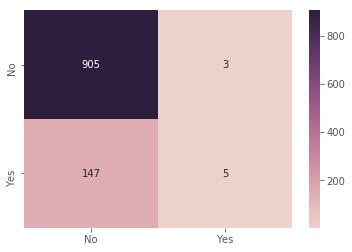

In [468]:
cmap = sns.cubehelix_palette(as_cmap=True)
sns.heatmap(conf,cmap = cmap,xticklabels=['No','Yes'],yticklabels=['No','Yes'],annot=True, fmt="d")

In [469]:
predict_probabilities = logreg.predict_proba(X_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, predict_probabilities[:,1])

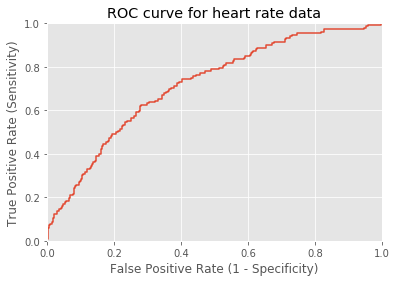

In [470]:
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for heart rate data')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [471]:
roc_auc = metrics.auc(fpr, tpr)
print("Area under the ROC curve : %f" % roc_auc)

Area under the ROC curve : 0.716142


In [472]:
# train a logistic regression model on the training set

logreg = LogisticRegression(class_weight='balanced')
logreg.fit(X_train, y_train)
# make class predictions for the testing set
y_pred_class = logreg.predict(X_test)

In [473]:
conf=metrics.confusion_matrix(y_test, y_pred_class)
print(metrics.confusion_matrix(y_test, y_pred_class))

[[604 304]
 [ 50 102]]


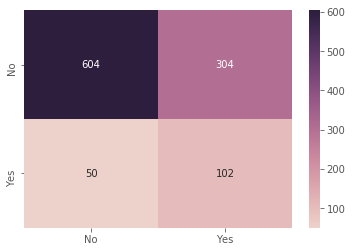

In [474]:
cmap = sns.cubehelix_palette(as_cmap=True)
sns.heatmap(conf,cmap = cmap,xticklabels=['No','Yes'],yticklabels=['No','Yes'],annot=True, fmt="d")

In [429]:
predict_probabilities = logreg.predict_proba(X_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, predict_probabilities[:,1])


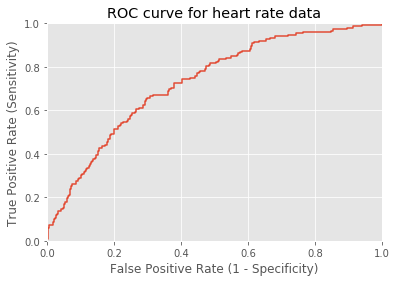

In [430]:
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for heart rate data')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [431]:
roc_auc = metrics.auc(fpr, tpr)
print("Area under the ROC curve : %f" % roc_auc)

Area under the ROC curve : 0.727619
